In [1]:
import pandas as pd

# Load the dataset
url = 'https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=1'  # Add dl=1 to get the raw CSV file
nba = pd.read_csv(url)

# Display the first few rows of the dataset
print(nba.head())


          player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  ...  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468  ...   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503  ...   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520  ...   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459  ...   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546  ...   

   drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0  144  216   28   23   26   30  122   171  2013-2014        2013  
1  190  332   43   40   57   71  203   265  2013-2014        2013  
2  204  306   38   24   36   39  108   362  2013-2014        2013  
3  230  262  248   35    3  146  136  1330  2013-2014        2013  
4  183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 31 columns]


In [2]:
# Select features and target variable
features = nba[['g', 'gs', 'fg', 'fga', 'trb', 'ast', 'stl', 'blk', 'tov']]  # Adjust based on your analysis
target = nba['pts']

# Check for missing values
print(features.isnull().sum())


g      0
gs     0
fg     0
fga    0
trb    0
ast    0
stl    0
blk    0
tov    0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create KNN model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3544.787628865979


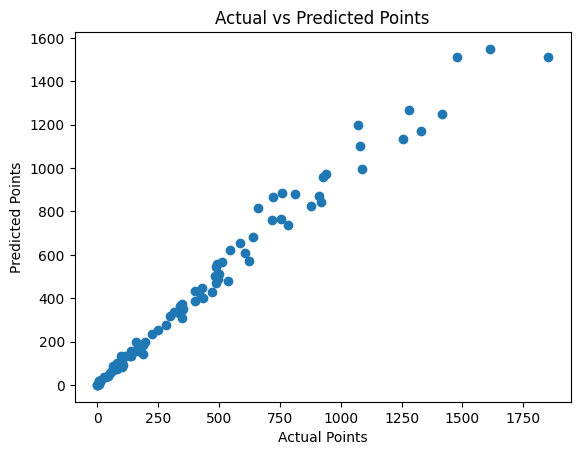

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()


In [6]:
from bs4 import BeautifulSoup
import urllib.request
from nltk import FreqDist, word_tokenize
import nltk

# Download NLTK data files if necessary
nltk.download('punkt')

# URL of the webpage
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html, "html5lib")

# Get text
text = soup.get_text()

# Tokenize words
words = word_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Calculate frequency distribution
freq_dist = FreqDist(words)

# Display the most common words
print(freq_dist.most_common(10))


[('.', 172), ('the', 160), ('PHP', 154), ('of', 86), (',', 79), ('is', 67), ('release', 67), ('in', 63), ('The', 62), ('to', 46)]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy import misc

# Load the image (ensure you have the right image)
raccoon_image = misc.face(gray=True)

# Reshape the image to a 2D array of pixels
pixels = raccoon_image.reshape(-1, 1)  # For grayscale


<ipython-input-8-28a0c2f6f18c>:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raccoon_image = misc.face(gray=True)


In [9]:
# Apply KMeans
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(pixels)

# Replace each pixel with its corresponding cluster center
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_pixels.reshape(raccoon_image.shape)


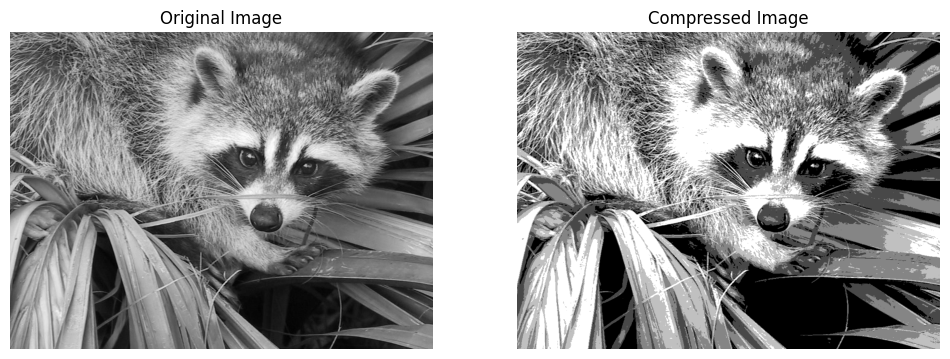

In [10]:
# Plot the original and compressed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(raccoon_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed Image')
plt.imshow(compressed_image, cmap='gray')
plt.axis('off')

plt.show()


In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [12]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


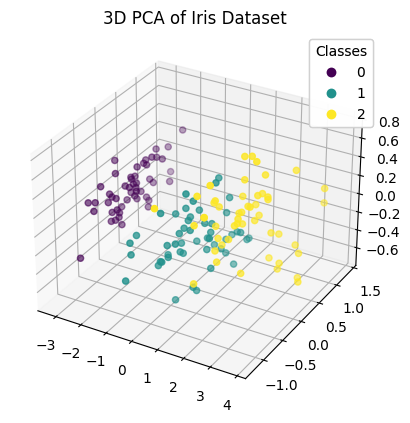

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

ax.set_title('3D PCA of Iris Dataset')
plt.show()


<ipython-input-26-3fa432031d68>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('/content/shampoo_sales.csv', header=0, parse_dates=[0],


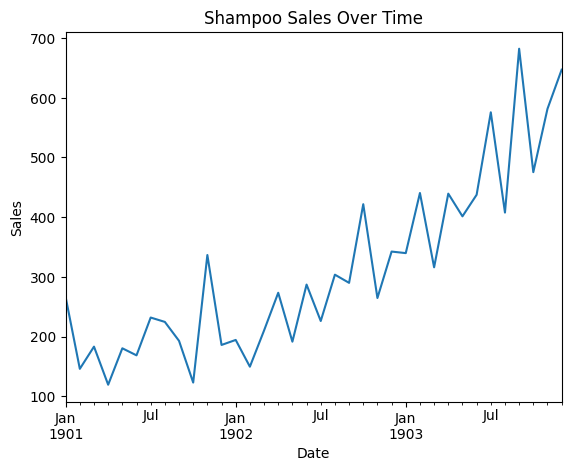

In [26]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Load data
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# Load the shampoo sales data
series = pd.read_csv('/content/shampoo_sales.csv', header=0, parse_dates=[0],
                     index_col=0, date_parser=parser)

# If you need a Series, extract it after loading
series = series.iloc[:, 0]  # Assuming you want the first column as Series

# Visualize the series
series.plot()
plt.title('Shampoo Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
